In [293]:
import os 

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import optimize

from scipy.io import loadmat



In [204]:
data=pd.read_csv("F:/house_prices_data_training_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,...,7,1802,0,1961,0,98125,47.7205,-122.323,1810,7332
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,...,12,3420,1060,1902,0,98112,47.6275,-122.315,3220,5600
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,...,7,940,370,1980,0,98031,47.3958,-122.189,1400,7161
17997,205000410,20140915T000000,630000.0,3,2.50,2320,32772,2.0,0,0,...,9,2320,0,1992,0,98053,47.6304,-121.988,2610,33305


In [205]:
x, y= data['sqft_living'], data['price']

m = y.size

Text(0.5, 0, 'Living room size feet measurements')

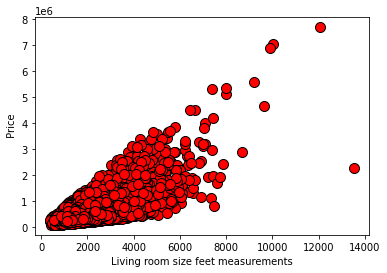

In [206]:
plt.plot(x, y, 'ro', ms=10, mec='k')
plt.ylabel(' Price')
plt.xlabel('Living room size feet measurements')

In [207]:
normaldata=data
normaldata=(normaldata - normaldata.mean()) / normaldata.std()

normaldata

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,-1.399361,-0.388600,-0.672411,NaN,-0.849901,-0.506515,0.894683,-0.350970,-0.301063,-0.853907,...,-0.672121,-0.965747,-0.940655,-0.238104,-0.279035,-0.3113,-0.088855,-0.439593,-0.217626,1.846287
1,0.248341,-0.388600,-0.672411,NaN,1.112180,-0.506515,0.644858,1.151420,-0.746672,0.013517,...,0.217870,0.574003,-0.420740,-0.200605,-0.206317,-0.3113,-0.088855,-0.582755,4.583230,0.867071
2,-1.399361,-1.459226,-0.672411,NaN,-0.849901,-1.361585,0.371490,1.272441,-0.128569,-0.968887,...,-0.672121,-1.419918,1.109296,-0.135643,-0.190852,-0.3113,-0.088855,-1.226985,-0.217626,-0.925079
3,1.236962,0.682027,2.325912,NaN,-0.849901,-0.506515,-0.726836,-0.282224,-1.278529,0.194631,...,1.352608,-0.101715,-0.910946,-0.253414,-0.302799,-0.3113,-0.088855,-0.081687,-0.217626,1.070305
4,-0.081200,-0.388600,-0.672411,NaN,-0.849901,0.348555,-0.912947,0.405238,1.222634,-0.063319,...,-0.672121,-0.411880,-0.257338,-0.180867,-0.211289,-0.3113,-0.088855,0.705706,-0.217626,-0.075193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,-1.399361,-1.459226,-0.672411,NaN,-0.849901,-0.506515,0.644858,1.147839,-0.775421,-0.584707,...,-0.672121,-0.276737,-0.242484,-0.106789,-0.217541,-0.3113,-0.088855,-0.224849,-0.217626,0.867071
17995,1.236962,1.752654,2.325912,NaN,2.093221,3.768836,-1.125361,0.481861,-0.717923,3.998016,...,1.686354,2.689774,1.852031,-0.253414,-0.280863,-0.3113,-0.088855,-2.336494,-0.217626,0.626886
17996,-1.399361,-1.459226,0.826750,NaN,-0.849901,-0.506515,-0.822892,-1.177355,0.187670,-0.768565,...,0.151120,-0.821741,-0.851527,-0.203291,-0.223793,-0.3113,-0.088855,0.455172,-0.217626,-0.869652
17997,0.577881,-0.388600,-0.672411,NaN,1.112180,1.203625,-1.524025,0.502628,1.632307,0.265978,...,-0.672121,0.297069,0.945894,0.400735,0.732028,-0.3113,-0.088855,0.884659,-0.217626,-0.463185


In [208]:
normaldata.columns

Index(['bathrooms', 'bedrooms', 'condition', 'date', 'floors', 'grade', 'id',
       'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
       'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [209]:
train, validate, test = np.split(normaldata.sample(frac=1), [int(.6*len(normaldata)), int(.8*len(normaldata))])
train = train.to_numpy()
validate = validate.to_numpy()
test = test.to_numpy()
train


array([[0.5778812032747966, -0.38859959644900627, -0.6724114268508599,
        ..., 0.848868695994615, -0.21762638412193264,
        -0.3708058234025056],
       [0.5778812032747966, 0.6820270890684685, 0.826750380641848, ...,
        0.3120098624478637, -0.21762638412193264, -0.4816604814041492],
       [1.8960428200720678, 0.6820270890684685, -0.6724114268508599, ...,
        1.0994028183164324, -0.21762638412193264, -0.05671762573118227],
       ...,
       [0.24834079907547882, -0.38859959644900627, -0.6724114268508599,
        ..., 0.3120098624478637, -0.21762638412193264,
        1.4213444809573983],
       [-0.4107400093231568, -0.38859959644900627, 0.826750380641848,
        ..., 0.06147574012604645, -0.21762638412193264,
        -0.4816604814041492],
       [0.5778812032747966, -0.38859959644900627, -0.6724114268508599,
        ..., -0.26063956000200433, -0.21762638412193264,
        -0.832700231742687]], dtype=object)

In [319]:
X_train = train[:, [0,1]]
xtrain= train [:,[0]]
X_train


array([[0.5778812032747966],
       [0.5778812032747966],
       [1.8960428200720678],
       ...,
       [0.24834079907547882],
       [-0.4107400093231568],
       [0.5778812032747966]], dtype=object)

In [211]:
y_train = train[:, 9]
y_train

m = y_train.size

In [212]:
X_train = np.concatenate([np.ones((m,1)), X_train], axis =1)
X_train

array([[1.0, 0.5778812032747966, -0.38859959644900627],
       [1.0, 0.5778812032747966, 0.6820270890684685],
       [1.0, 1.8960428200720678, 0.6820270890684685],
       ...,
       [1.0, 0.24834079907547882, -0.38859959644900627],
       [1.0, -0.4107400093231568, -0.38859959644900627],
       [1.0, 0.5778812032747966, -0.38859959644900627]], dtype=object)

In [213]:
X_validate = validate[:, [0,1]]
X_validate

array([[-0.4107400093231568, 0.6820270890684685],
       [-0.08119960512383899, -1.4592262819664812],
       [0.24834079907547882, -0.38859959644900627],
       ...,
       [0.5778812032747966, 0.6820270890684685],
       [1.2369620116734323, 0.6820270890684685],
       [-0.08119960512383899, 0.6820270890684685]], dtype=object)

In [214]:
y_validate = validate[:, 9]
y_validate

mm = y_validate.size

In [215]:
X_validate = np.concatenate([np.ones((mm,1)), X_validate], axis =1)
X_validate

array([[1.0, -0.4107400093231568, 0.6820270890684685],
       [1.0, -0.08119960512383899, -1.4592262819664812],
       [1.0, 0.24834079907547882, -0.38859959644900627],
       ...,
       [1.0, 0.5778812032747966, 0.6820270890684685],
       [1.0, 1.2369620116734323, 0.6820270890684685],
       [1.0, -0.08119960512383899, 0.6820270890684685]], dtype=object)

In [216]:
X_test = test[:, [0,1]]
X_test

array([[1.56650241587275, -0.38859959644900627],
       [0.5778812032747966, -0.38859959644900627],
       [0.5778812032747966, -0.38859959644900627],
       ...,
       [1.56650241587275, -0.38859959644900627],
       [-1.3993612219211102, -1.4592262819664812],
       [-0.4107400093231568, -0.38859959644900627]], dtype=object)

In [217]:
y_test = test[:, 9]
y_test

mmm = y_test.size

In [218]:
X_test = np.concatenate([np.ones((mmm,1)), X_test], axis =1)
X_test

array([[1.0, 1.56650241587275, -0.38859959644900627],
       [1.0, 0.5778812032747966, -0.38859959644900627],
       [1.0, 0.5778812032747966, -0.38859959644900627],
       ...,
       [1.0, 1.56650241587275, -0.38859959644900627],
       [1.0, -1.3993612219211102, -1.4592262819664812],
       [1.0, -0.4107400093231568, -0.38859959644900627]], dtype=object)

In [219]:
def computeCostMulti(X_train, y_train, theta):
    m = y_train.shape[0]
    J=0
    
    hTheta = np.dot(X_train, theta)
    #J = (1/(2 * m)) * np.sum(np.square(hTheta - y_train))
    J= (1/(2*m)) * np.dot((np.dot(np.power(X_train,1),theta)-y_train),(np.dot(np.power(X_train,1),theta)-y_train))
    return J

In [220]:
def gradientDescentMulti(X_train, y_train, theta, alpha, num_iters):
    m = y.shape[0] 
    theta = theta.copy()
    
    J_history = []
  
    
    for i in range(num_iters):
        
        hypothesis = np.dot(X_train, theta)
        theta = theta - ((alpha/m)*(np.dot(X_train.T,hypothesis - y_train)))

        J_history.append(computeCostMulti(X_train, y_train, theta))
    
    return theta, J_history

theta computed from gradient descent: [-0.0009511247625993333 0.21534751639916358 0.1029273482562676]


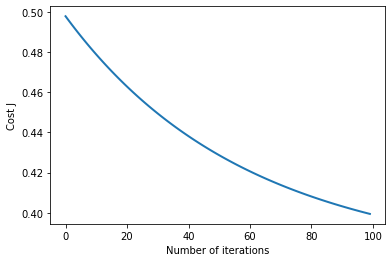

In [234]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [228]:
def computeCostMulti2(X_train, y_train, theta):
    m = y_train.shape[0]
    J=0
    
    hTheta = np.dot(np.square(X_train), theta)
    #J = (1/(2 * m)) * np.sum(np.square(hTheta - y_train))
    J= (1/(2*m)) * np.dot((np.dot(np.power(X_train,2),theta)-y_train),(np.dot(np.power(X_train,2),theta)-y_train))
    return J

In [229]:
def gradientDescentMulti2(X_train, y_train, theta, alpha, num_iters):
    m = y.shape[0] 
    theta = theta.copy()
    
    J_history = []
  
    
    for i in range(num_iters):
        
        hypothesis = np.dot(np.square(X_train), theta)
        theta = theta - ((alpha/m)*(np.dot(np.square(X_train).T,hypothesis - y_train)))

        J_history.append(computeCostMulti2(X_train, y_train, theta))
    
    return theta, J_history

theta computed from gradient descent: [-0.05053982346433354 0.15312879765313367 -0.0006858583723469697]


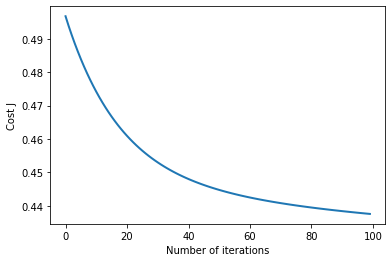

In [230]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti2(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [231]:
def computeCostMulti3(X_train, y_train, theta):
    m = y_train.shape[0]
    J=0
    
    hTheta = np.dot(np.power(X_train,3), theta)
    J = (1/(2 * m)) * np.sum(np.square(hTheta - y_train))
    #J= (1/(2*m)) * np.dot((np.dot(np.power(X_train,3),theta)-y_train),(np.dot(np.power(X_train,3),theta)-y_train))
    return J

In [232]:
def gradientDescentMulti3(X_train, y_train, theta, alpha, num_iters):
    m = y.shape[0] 
    theta = theta.copy()
    
    J_history = []
  
    
    for i in range(num_iters):
        
        hypothesis = np.dot(np.power(X_train,3), theta)
        theta = theta - ((alpha/m)*(np.dot(np.power(X_train,3).T,hypothesis - y_train)))

        J_history.append(computeCostMulti3(X_train, y_train, theta))
    
    return theta, J_history

theta computed from gradient descent: [-0.0009511247625993333 0.21534751639916358 0.1029273482562676]


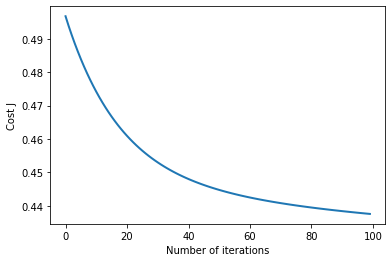

In [233]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_histori = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [199]:
def computeCostMulti4(X_train, y_train, theta):
    m = y_train.shape[0]
    J=0
    
    hTheta = np.dot(np.power(X_train,4), theta)
    #J = (1/(2 * m)) * np.sum(np.square(hTheta - y_train))
    J= (1/(2*m)) * np.dot((np.dot(np.power(X_train,4),theta)-y_train),(np.dot(np.power(X_train,4),theta)-y_train))
    return J

In [200]:
def gradientDescentMulti4(X_train, y_train, theta, alpha, num_iters):
    m = y.shape[0] 
    theta = theta.copy()
    
    J_history = []
  
    
    for i in range(num_iters):
        
        hypothesis = np.dot(np.power(X_train,4), theta)
        theta = theta - ((alpha/m)*(np.dot(np.power(X_train,4).T,hypothesis - y_train)))

        J_history.append(computeCostMulti4(X_train, y_train, theta))
    
    return theta, J_history

<ipython-input-199-ee5717672c86>:6: RuntimeWarning: overflow encountered in square
  J = (1/(2 * m)) * np.sum(np.square(hTheta - y_train))
c:\users\hatem\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-200-1631853dc07a>:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m)*(np.dot(np.power(X_train,4).T,hypothesis - y_train)))


theta computed from gradient descent: [nan nan nan]


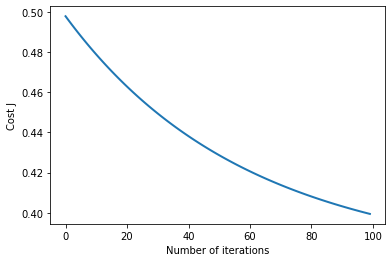

In [235]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_historia = gradientDescentMulti4(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [ ]:
alpha = 0.04
num_iters = 100

theta = np.zeros(3)
theta, J_historia = gradientDescentMulti3(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.007110758670068342 0.3876805593163346 0.13787063200652946]


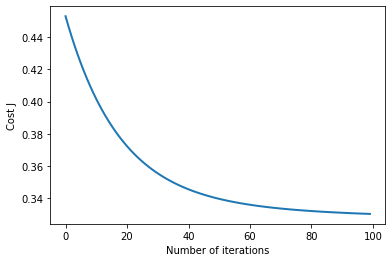

In [244]:
alpha = 0.1
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X_validate, y_validate, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.15086500160736255 0.20411016170044877 -0.01853524356216298]


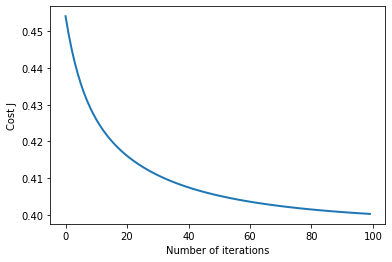

In [245]:
alpha = 0.1
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti2(X_validate, y_validate, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.04569470983292006 0.0921567983101148 0.01738143961581422]


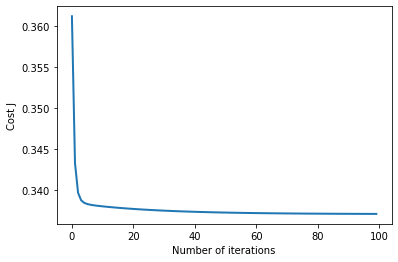

In [246]:
alpha = 0.1
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti3(X_validate, y_validate, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.01425317860556602 0.020671985606185706 -0.001060339532876487]


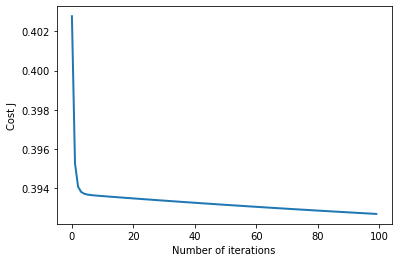

In [249]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti4(X_validate, y_validate, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [0.002938830470819203 0.10193583884060478 0.05152085867375287]


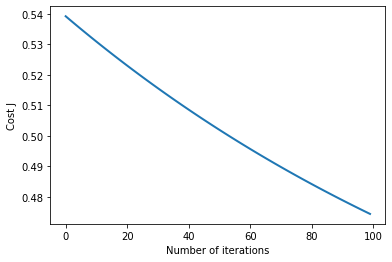

In [255]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X_test, y_test, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.01240634342349132 0.12698084354986425 0.0070100243507030145]


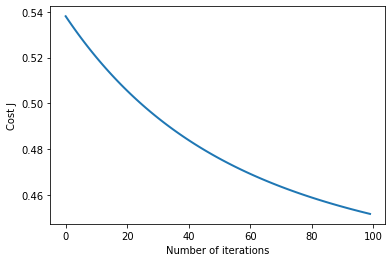

In [252]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti2(X_test, y_test, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.005846041851267348 0.0693991642714327 0.01747113124283551]


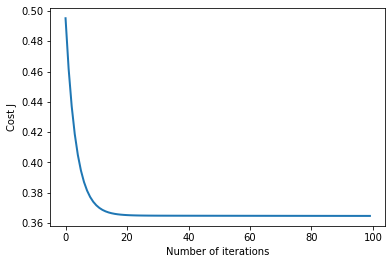

In [253]:
alpha = 0.01
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti3(X_test, y_test, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

theta computed from gradient descent: [-0.0009508690734939005 0.011967269620728329 0.0029887620600213246]


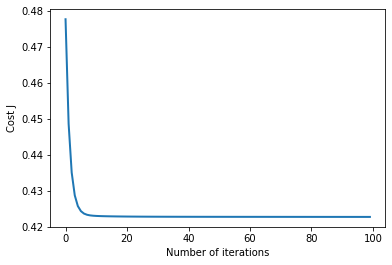

In [259]:
alpha = 0.001
num_iters = 100

theta = np.zeros(3)
theta, J_history = gradientDescentMulti4(X_test, y_test, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [274]:
Jvalidate2 = computeCostMulti2(X_validate, y_validate, theta)
Jvalidate2

0.4528224123806858

In [273]:
Jvalidate = computeCostMulti(X_validate, y_validate, theta)
Jvalidate

0.4533108496414869

In [272]:
Jvalidate3 = computeCostMulti3(X_validate, y_validate, theta)
Jvalidate3

0.4295191183246868

In [266]:
Jtest1 = computeCostMulti(X_test, y_test, theta)
Jtest1

0.5323499993050604

In [267]:
Jtest2 = computeCostMulti2(X_test, y_test, theta)
Jtest2

0.5280922212191708

In [268]:
Jtest3 = computeCostMulti3(X_test, y_test, theta)
Jtest3

0.4848551368937611

In [357]:
def linearRegCostFunction(X_train, y_train, theta, lambda_=0.01):
    m = y_train.size 
    J = 0
    grad = np.zeros(theta.shape)

    
    h = X_train.dot(theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y_train)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    grad = (1 / m) * (h - y_train).dot(X_train)
    
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

   
    return J, grad


In [358]:
theta = np.zeros(3)
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X_train], axis=1), y_train, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)

Cost at theta = [1, 1]:	   0.500017 


In [359]:
theta = np.zeros(3)
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X_train], axis=1), y_train, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))


Gradient at theta = [1, 1]:  [0.000923, -0.510703] 


In [373]:
def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
   
    initial_theta = np.zeros(X_train.shape[1])

    
    costFunction = lambda t: linearRegCostFunction(X_train, y_train, t, lambda_)

    
    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='slsqp' ,options=options)
    return res.x

In [365]:
 
def learningCurve(X_train, y_train, X_validate, y_validate, lambda_=0):
    m = y_train.size
    error_train = np.zeros(m)
    error_validate   = np.zeros(m)

    
    for i in range(1, m + 1):
        theta_t = trainLinearReg(linearRegCostFunction, X_train[:i], y_train[:i], lambda_ = lambda_)
        error_train[i - 1], _ = linearRegCostFunction(X_train[:i], y_train[:i], theta_t, lambda_ = 0)
        error_validate[i - 1], _ = linearRegCostFunction(X_validate, y_validate, theta_t, lambda_ = 0)
        
    return error_train, error_validate

In [366]:
for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9


In [ ]:
X_augmentation = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_validate_augmentation = np.concatenate([np.ones((y_validate.size, 1)), X_validate], axis=1)
error_train, error_validate = learningCurve(X_augmentation, y_train, X_validate_augmentation, y_validate, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_validate, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_validate[i]))

In [374]:
def validationCurve(X_train, y_train, X_validate, y_validate):
    
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    error_train = np.zeros(len(lambda_vec))
    error_validate = np.zeros(len(lambda_vec))

    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        theta_t = trainLinearReg(linearRegCostFunction, X_train, y_train, lambda_ = lambda_try)
        error_train[i], _ = linearRegCostFunction(X_train, y_train, theta_t, lambda_ = 0)
        error_validate[i], _ = linearRegCostFunction(X_validate, y_validate, theta_t, lambda_ = 0)

    return lambda_vec, error_train, error_validate

In [376]:
lambda_vec, error_train, error_val = validationCurve(X_train, y_train, X_validate, y_validate)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_validate, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_validate[i]))

ValueError: shapes (3600,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)